Author: Connor Marrs
The first bit of code handles the special case of the Gaussian Free Field on
the circle with $s=\frac{1}{2}$, which is actually a Brownian Bridge.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This program simulates the Gaussian Free Field on the circle
given by

$$
  X_s(\theta) \triangleq \sum_{n=1}^\infty \frac{\sin(n\theta)}{n^{2s}}Z_n
$$

where $\{Z_n\}_{n=1}^\infty$ is a sequence of i.i.d standard Gaussians
provided that $s>\frac{1}{4}$.

In [9]:
# compute the nth partial sum of X_s(\theta)
def gff_partial_sum(n,s,t, Z):
  # construct a vector of the coefficients of the sum
  coeff = [np.sin(m*t)/m**(2*s) for m in range(1,n+1)]

  return Z.dot(coeff)

"""
  Set the Parameters
"""
precision=0.001
numterms = 1000 # number of terms in partial sum
s = 5 # s value
# construct a random vector of i.i.d standard normals of size n
Z = np.random.default_rng().normal(0, 1, n)

theta = np.arange(0,np.pi,precision) # time grid
pos_vals = np.array(
    [gff_partial_sum(numterms, s,t) for t in theta]
)

vals = np.append(-np.flip(pos_vals),pos_vals)
total_theta = np.append(-np.flip(theta),theta)

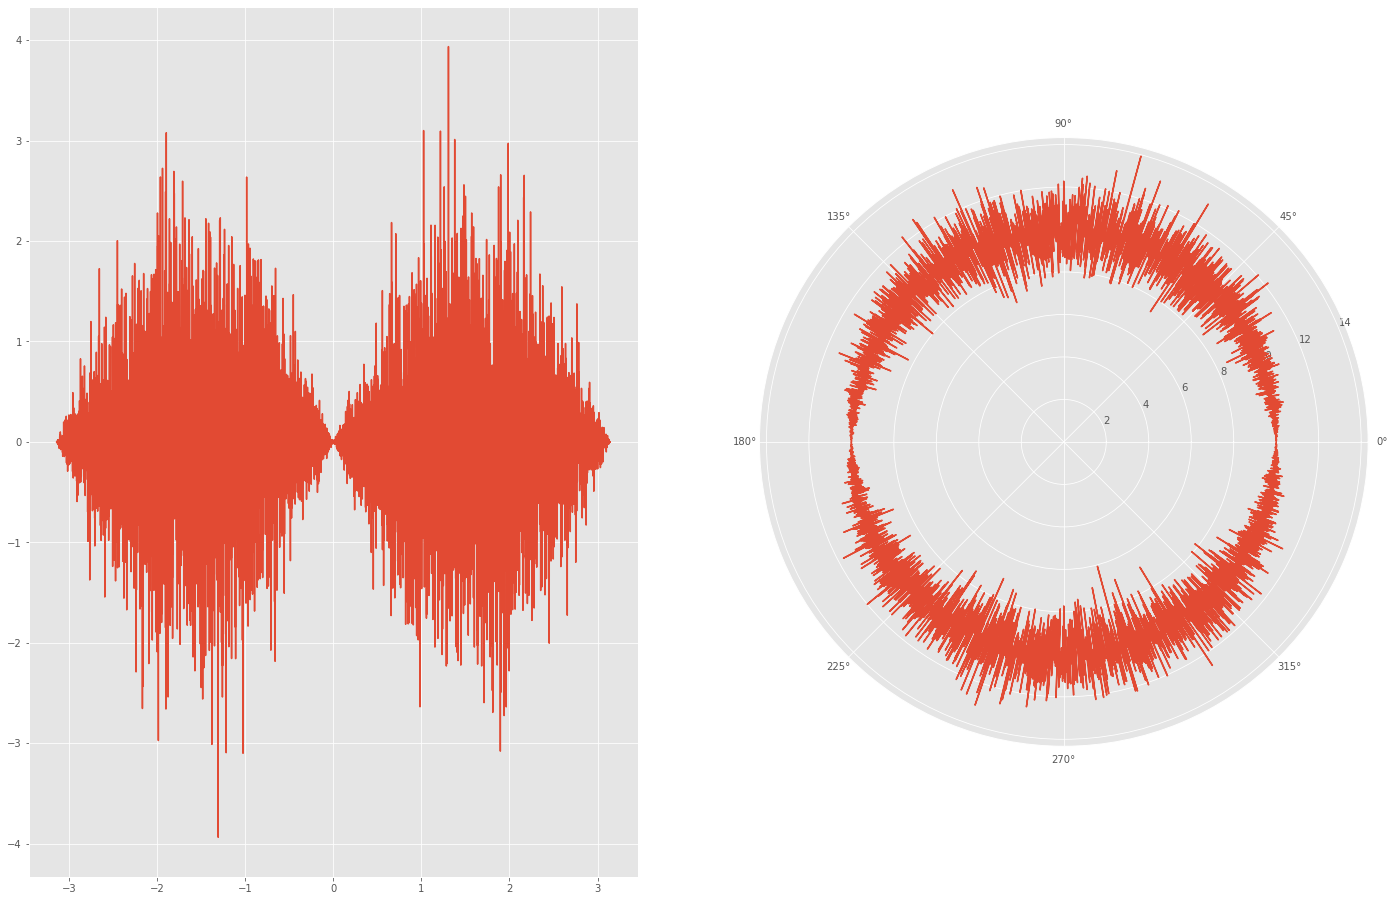

In [3]:
# Plotting the GFF on two axes - both polar and normal.
# %matplotlib widget
plt.style.use('ggplot')

fig = plt.figure(figsize=(24,16))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')

ax1.plot(total_theta,vals)
ax2.plot(total_theta,10+vals)
plt.show()


<IPython.core.display.Javascript object>


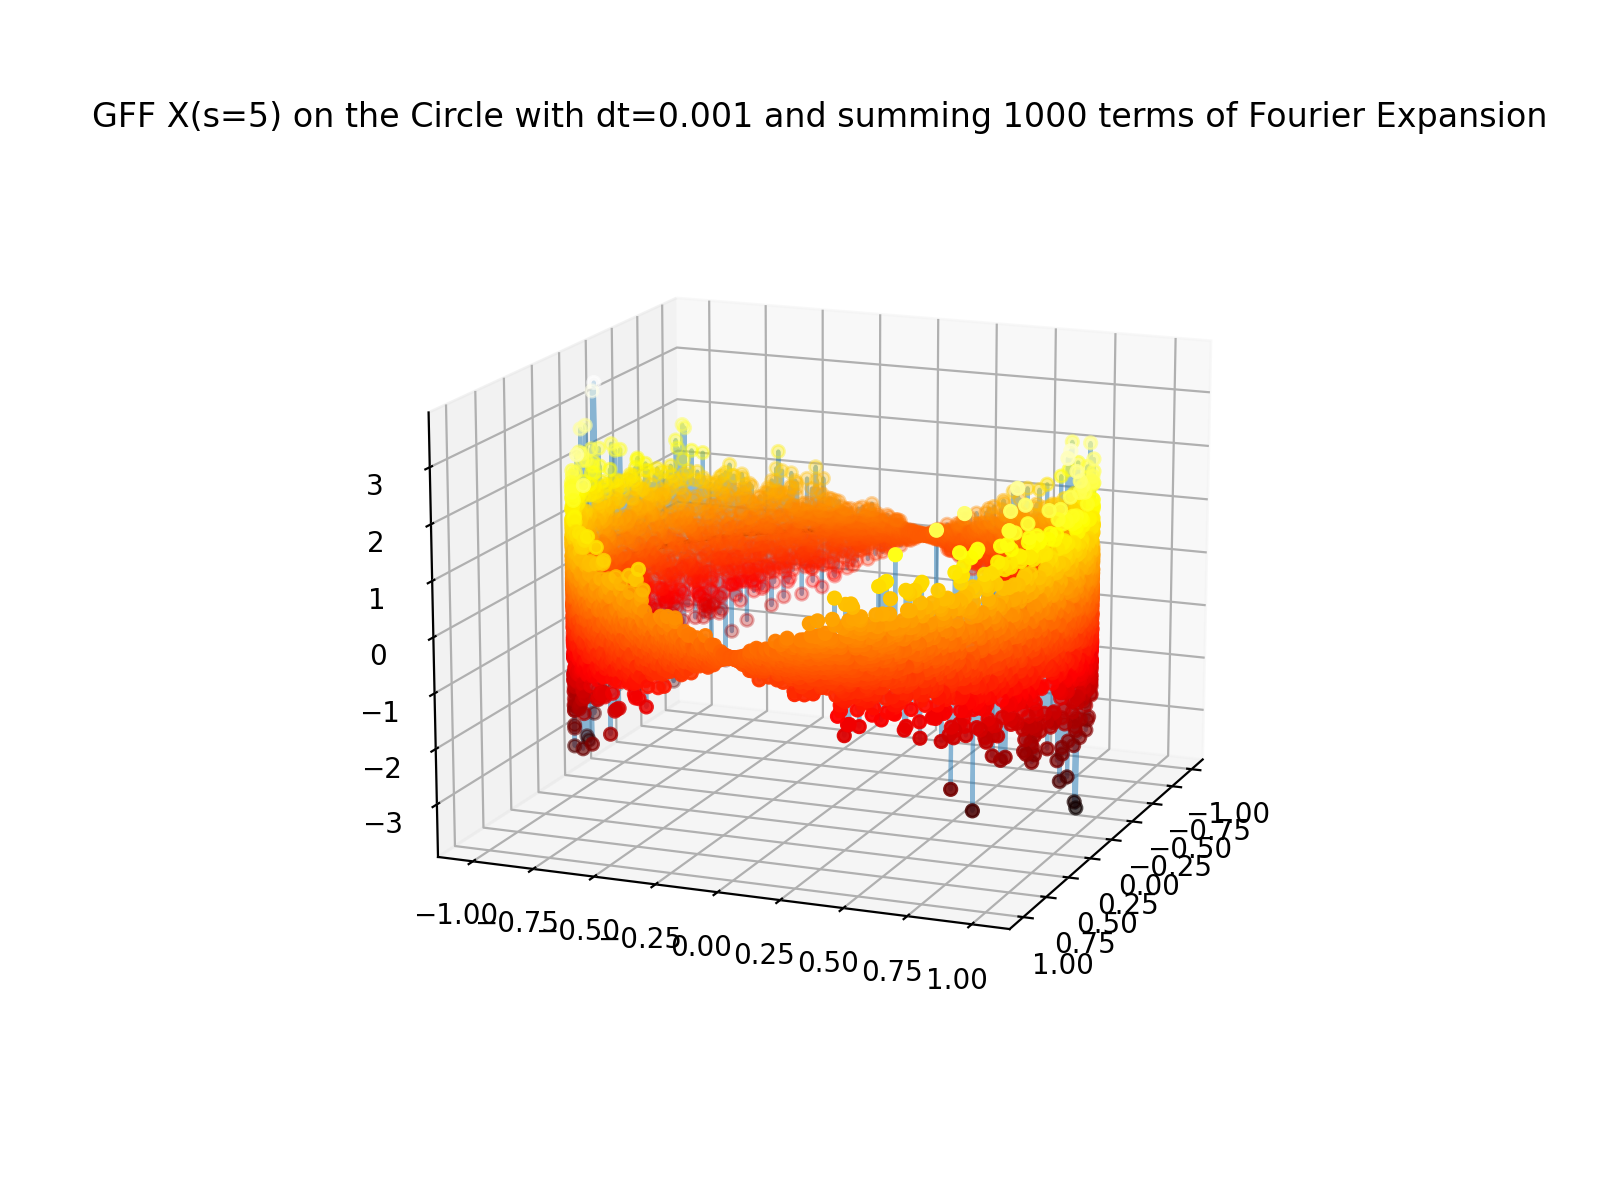

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.view_init(60, 35)

# TO DO: Make the height of points given by heatplot

# Data for a three-dimensional line
ax.scatter3D(np.cos(total_theta), np.sin(total_theta), vals, cmap='hot', c=vals)
ax.plot3D(np.cos(total_theta), np.sin(total_theta), vals, alpha=0.5)
ax.plot3D(np.cos(total_theta), np.sin(total_theta), 0*total_theta, 'black')

plt.title(
    f'GFF X(s={s}) on the Circle with dt={precision} and summing {numterms} terms of Fourier Expansion'
)
plt.show()